In [134]:
import numpy as np
import pandas as pd

In [135]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [137]:
data.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [138]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [139]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
data[['Balance','CreditScore','EstimatedSalary' ]] = scaler.fit_transform(data[['Balance','CreditScore','EstimatedSalary']])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,France,0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,Spain,0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,France,0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,France,0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,Spain,0,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,1.246488,France,1,39,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,Johnstone,-1.391939,France,1,35,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,Liu,0.604988,France,0,36,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,Sabbatini,1.256835,Germany,1,42,3,-0.022608,2,1,0,-0.125231,1


In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'O' else col)

In [143]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,1177,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,2040,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,289,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,1822,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,1.246488,0,1,39,5,-1.225848,2,1,0,-0.066419,0
9996,9997,15569892,1336,-1.391939,0,1,35,10,-0.306379,1,1,1,0.027988,0
9997,9998,15584532,1570,0.604988,0,0,36,7,-1.225848,1,0,1,-1.008643,1
9998,9999,15682355,2345,1.256835,1,1,42,3,-0.022608,2,1,0,-0.125231,1


In [144]:

from sklearn.model_selection import train_test_split

X = data.drop(columns ='Exited',axis = 1)
Y = data['Exited']

X_train,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [145]:
print(X)


      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115    -0.326221          0       0   42   
1             2    15647311     1177    -0.440036          2       0   41   
2             3    15619304     2040    -1.536794          0       0   42   
3             4    15701354      289     0.501521          0       0   39   
4             5    15737888     1822     2.063884          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999     1.246488          0       1   39   
9996       9997    15569892     1336    -1.391939          0       1   35   
9997       9998    15584532     1570     0.604988          0       0   36   
9998       9999    15682355     2345     1.256835          1       1   42   
9999      10000    15628319     2751     1.463771          0       0   28   

      Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      

In [ ]:
print(Y)

In [147]:
print(X.shape , X_train.shape,X_test.shape)

(10000, 13) (8000, 13) (2000, 13)


In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [149]:
model.fit(X_train,Y_train)

LogisticRegression()

In [150]:
from sklearn.metrics import accuracy_score
X_train_prec = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prec,Y_train)

In [151]:
print(training_data_accuracy)

0.79325


In [152]:
X_test_prec = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prec,Y_test)

In [153]:
print(test_data_accuracy)

0.8085


In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
from keras.models import Sequential
from keras.layers import Dense

In [156]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'softmax'))

In [157]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 112       
                                                                 
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 998 (3.90 KB)
Trainable params: 998 (3.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, Y_train, batch_size = 16, epochs = 70, verbose = 1)

Epoch 1/70
500/500 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.8342
Epoch 2/70
500/500 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8367
Epoch 3/70
500/500 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8371
Epoch 4/70
500/500 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8378
Epoch 5/70
500/500 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8370
Epoch 6/70
500/500 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8356
Epoch 7/70
500/500 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.8353
Epoch 8/70
500/500 [==============================] - 1s 2ms/step - loss: 0.3975 - accuracy: 0.8361
Epoch 9/70
500/500 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8346
Epoch 10/70
500/500 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8355

In [160]:
score, acc = classifier.evaluate(X_train, Y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

print('*'*20)
score, acc = classifier.evaluate(X_test, Y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

800/800 [==============================] - 2s 2ms/step - loss: 0.3898 - accuracy: 0.8416
Train score: 0.3897605538368225
Train accuracy: 0.8416249752044678
********************
200/200 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8400
Test score: 0.410247802734375
Test accuracy: 0.8399999737739563


In [161]:
# Predicting the Test set results
pred = classifier.predict(X_test)
print("Y_pred:", pred)
print("*****************")
y_pred = np.argmax(pred, axis = 1)
print("Y_pred:", y_pred)
print("*****************")
print("Y_test:", Y_test)
y_true = np.array(Y_test)#.tolist()
print("*****************")
print("Y_test:", y_true)

63/63 [==============================] - 0s 1ms/step
Y_pred: [[8.70183527e-01 1.29816458e-01 1.98635367e-15 1.99936854e-15
  1.85164748e-15 1.99704344e-15]
 [6.49074316e-01 3.50925744e-01 3.72430797e-08 3.72915565e-08
  3.73074940e-08 3.75373297e-08]
 [8.54847133e-01 1.45152822e-01 3.48298680e-25 3.58531957e-25
  3.57454471e-25 3.67687353e-25]
 ...
 [9.05478895e-01 9.45210978e-02 1.36928087e-17 1.38276044e-17
  1.26843746e-17 1.38230698e-17]
 [8.42634916e-01 1.57365143e-01 4.94789654e-14 4.97915714e-14
  4.70571797e-14 4.98863442e-14]
 [7.52688825e-01 2.47311130e-01 2.67721365e-13 2.70902495e-13
  2.69962167e-13 2.73716000e-13]]
*****************
Y_pred: [0 0 0 ... 0 0 0]
*****************
Y_test: 7878    1
3224    1
1919    1
4432    0
4835    0
       ..
9073    1
8584    0
5390    1
5092    1
2964    0
Name: Exited, Length: 2000, dtype: int64
*****************
Y_test: [1 1 1 ... 1 1 0]


In [162]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['Yes', 'No']

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

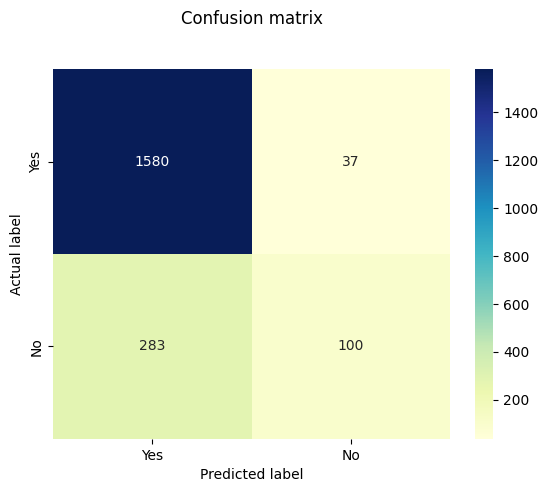

In [164]:
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [165]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred, target_names = target_names))

              precision    recall  f1-score   support

         Yes       0.85      0.98      0.91      1617
          No       0.73      0.26      0.38       383

    accuracy                           0.84      2000
   macro avg       0.79      0.62      0.65      2000
weighted avg       0.83      0.84      0.81      2000



In [166]:
y_true[0:4]

array([1, 1, 1, 0])

In [169]:
y_pred[1]

0

In [170]:
fpr, tpr, _ = roc_curve(y_true[0:10], y_pred[0:10])

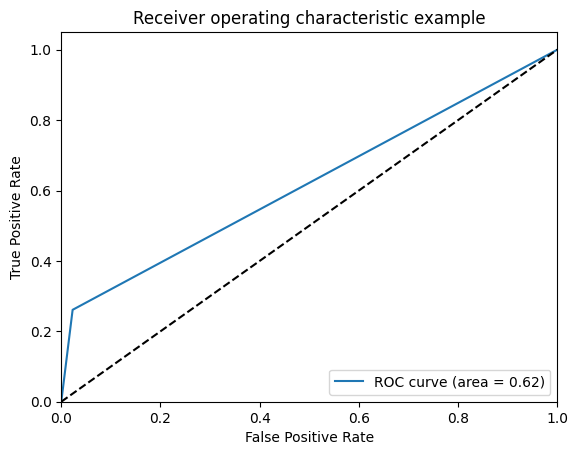

In [184]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = []
tpr = []
roc_auc = []
# for i in range(6):
#     print(y_true[i], y_pred[i])
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
# for i in range(10):
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()